In [1]:
from pathlib import Path
import math, os, time, shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
# Since we are just using mnist dataset then we will want all images that we show to be grayscale
mpl.rcParams['image.cmap'] = 'gray'

# Using the basic MNIST dataset to test out the basics first
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path = Path('data')
path.mkdir(exist_ok=True)
mnist_path = path/'mnist.pkl.gz'

# Gets a URL into a location onto disk, here we are checking if that path already exists, if it does not then we use urlretrieve and download it
from urllib.request import urlretrieve
if not mnist_path.exists(): 
    urlretrieve(MNIST_URL, mnist_path)

In [3]:
import gzip, pickle

# We can use gzipo to open the mnist file, and split the data into x/y, train/validation
with gzip.open(mnist_path, 'rb') as f: 
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [12]:
# Each image is of size 784 - we can always reshape them into 28 x 28
x_train[0].shape

def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

# Here we can loop over the size of our data that we have and then we can split this data into chunks that we can processs using yield x[i:i+sz] - the i will be the unique starting point
# Then we will jump over the size
list(chunks(x_train[0][210:250], 10))

[array([0.98828125, 0.98828125, 0.98828125, 0.98046875, 0.36328125,
        0.3203125 , 0.3203125 , 0.21875   , 0.15234375, 0.        ],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0.        , 0.0703125 , 0.85546875, 0.98828125, 0.98828125,
        0.98828125, 0.98828125, 0.98828125, 0.7734375 , 0.7109375 ],
       dtype=float32),
 array([0.96484375, 0.94140625, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       dtype=float32)]

In [14]:
from itertools import islice

it = iter(x_train[0][210:250])
# If you have an iterator that will allow you to go through the list of mnist pixels as an example here then we can use islice and choose the slice size that we want
# here given we have a value of 5 then we will slice through the iterator values of 5 at a time which is much easier that our prior chunks data
islice(it, 5)
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98046875, 0.36328125]

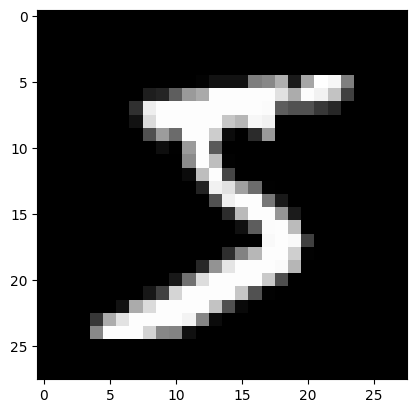

In [19]:
it = iter(x_train[0])
img = list(iter(lambda: list(islice(it, 28)), []))
plt.imshow(img, cmap="gray")

In [20]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    # By creating a matrix class that allows you to pass in an array of indexes this means that we can use array formatting [20, 15] instead of [20][15]
    # We just have to actually index them ourselves inside the class definition
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

# This is how torch does it
m = Matrix(img)
m[20,15]

0.98828125

In [21]:
import torch
from torch import tensor

tensor([1,2,3])

# We map the entire training set to tensors
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))

# We now have a training set of 50,000 of these images which are all FloatTensors
print(x_train.shape)
x_train.type()

torch.Size([50000, 784])


'torch.FloatTensor'

torch.Size([50000, 28, 28])


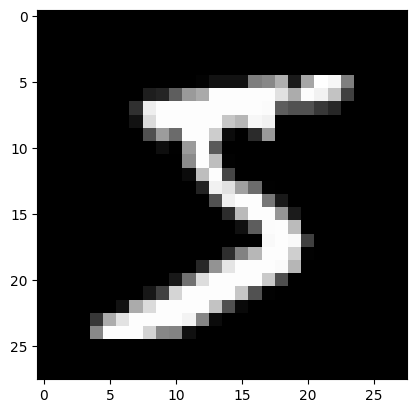

In [23]:
# .reshape allows us to choose how we want to format the matrices, we can use our -1 dimension to keep the 50,000 different images and then 28, 28
imgs = x_train.reshape((-1,28,28))
print(imgs.shape)
plt.imshow(imgs[0], cmap="gray")

In [28]:
# We can set printoptions witin torch and pandas that will help see our data easier
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

# Here we pick our first 5 numbers and then our sxecond matrix can be thought of as our wegihts taht would be part of a neural network
m1 = x_valid[:5]
m2 = weights

print(m1.shape,m2.shape)

# We have to make sure that the ac and br match and then our output will be ar, bc
ar,ac = m1.shape
br,bc = m2.shape
(ar,ac),(br,bc)

# This is our output array that we will fill in using the matrix multiplications
output = torch.zeros(ar, bc)
output.shape

for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            output[i,j] += m1[i,k] * m2[k,j]

output, output.shape

torch.Size([5, 784]) torch.Size([784, 10])


(tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
         [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
         [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
         [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
         [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]]),
 torch.Size([5, 10]))

In [ ]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

## Numba

In [ ]:
from numba import njit

# It will compile this function down to machine code - this one will take the dot product
# It does from up to 200ms to 20 microseconds
@njit
def dot(a,b):
    res = 0.0
    for i in range(len(a)):
        res += a[i] * b[i]
    return res

In [ ]:
%time dot(array([1.,2,3]),array([2.,3,4]))

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$
```

In [36]:
# Frobenius norm is the sum of all rows and columns of matrix squares - rooted

sf = (m*m).sum()
sf.sqrt()

TypeError: unsupported operand type(s) for *: 'Matrix' and 'Matrix'

In [30]:
# Both of these .unsqueeze(0) and [None, :] both do the same thing - they both insert a new unit axis to our data
output.unsqueeze(0), output[None, :]

(tensor([[[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
          [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
          [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
          [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
          [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]]]),
 tensor([[[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
          [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
          [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
          [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
          [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]]]))

In [31]:
# Using torch you can skip any use of : so you don't have to write [None, :] it would be equivalent to write [None]
# However also you can use ... to specify and all preceeding values
output[None].shape, output[...,None].shape

(torch.Size([1, 5, 10]), torch.Size([5, 10, 1]))

In [35]:
# Einsums are a compact representation of combining products and sums in a general way.
# Repeating letters multiply axes and omitting letters will sum that axis
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [37]:
# Here for exapmle if we want to do a matrix multiplication we would take row i and the value k as well as 
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
# values along the repeated k axis is going to be repeated then because we did not repeat the i or j then we will get those summed
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape, mr

mr.sum()

(torch.Size([5, 784, 10]),
 tensor([[[-0., -0., -0.,  ..., -0., -0., 0.],
          [-0., -0., -0.,  ..., -0., 0., 0.],
          [0., 0., -0.,  ..., -0., 0., -0.],
          ...,
          [0., 0., -0.,  ..., 0., 0., -0.],
          [0., 0., 0.,  ..., -0., 0., -0.],
          [-0., 0., -0.,  ..., -0., -0., 0.]],
 
         [[-0., -0., -0.,  ..., -0., -0., 0.],
          [-0., -0., -0.,  ..., -0., 0., 0.],
          [0., 0., -0.,  ..., -0., 0., -0.],
          ...,
          [0., 0., -0.,  ..., 0., 0., -0.],
          [0., 0., 0.,  ..., -0., 0., -0.],
          [-0., 0., -0.,  ..., -0., -0., 0.]],
 
         [[-0., -0., -0.,  ..., -0., -0., 0.],
          [-0., -0., -0.,  ..., -0., 0., 0.],
          [0., 0., -0.,  ..., -0., 0., -0.],
          ...,
          [0., 0., -0.,  ..., 0., 0., -0.],
          [0., 0., 0.,  ..., -0., 0., -0.],
          [-0., 0., -0.,  ..., -0., -0., 0.]],
 
         [[-0., -0., -0.,  ..., -0., -0., 0.],
          [-0., -0., -0.,  ..., -0., 0., 0.],
          

In [ ]:
# Here by omitting these outputs then this means that the k will be summed automatically meaning it can run faster instead of having two separate instructions especially if done on cuda
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [ ]:
def matmul(a,b): 
    return torch.einsum('ik,kj->ij', a, b)

In [ ]:
# Pytorch has their own prebuilt and optimised matrix multiplication, highly recommended to be used.
x_train @ weights